## MNIST Handwritten Digit Recogniser
We have 42000 training and 28000 test data which consists of handwritten images of the digits from 0 to 9. <br>
We are going to run an ML model on the existing data in order to predict and recognize any new image of a handwritten digit.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [23]:
print(train.shape)
train.head(10)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let us take a look at our dataset and try to visualize a few of the images to get a better understanding of the data. 

We will use <code>plt.imshow</code> which converts an array into an image.

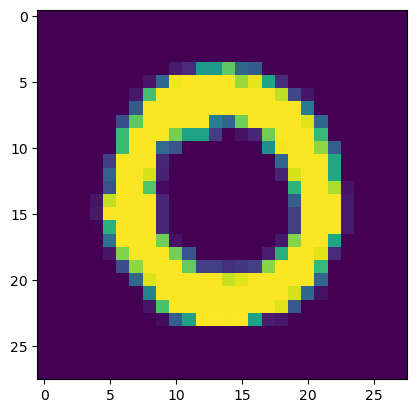

In [19]:
num = np.array(train.iloc[1,1:]).reshape(28,28) #reshape array into 28x28 matrix
plt.imshow(num)
plt.show()

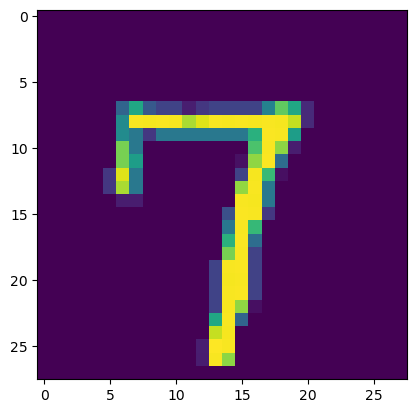

In [25]:
num = np.array(train.iloc[6,1:]).reshape(28,28) 
plt.imshow(num)
plt.show()

### Images in Python
Let's take a closer look at this image. We store the array for Image6 in <code>arr</code> and plot it's histogram.

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

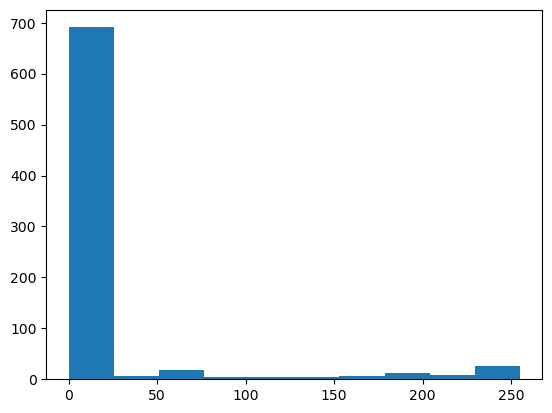

In [7]:
arr = train.iloc[6,1:]
plt.hist(arr)

In [8]:
max(arr)

255

We can see that the range of values in <code>arr</code> is from 0 to 255. <br>

Simply put, for an RBG image, it can be divided into 3 channels - <b>R</B> (Red), <b>B</b> (Blue), <b>G</b> (Green) and the propotions of these define its color, each ranging from 0 to 255.<br>
While, for a Grayscale image there is only one channel ranging from 0 to 255 with 0 representing pure black and 1 representing pure white.

### Feature Engineering for Images
We are going to use ImageDataGenerator for this. <br>
ImageDataGenerator generate batches of tensor image data with real-time data augmentation. It allows our model to receive new variations of the images at each epoch.

In [9]:
x = np.array(train)
y = np.array(test)

X_train = x[:,1:]
Y_train = x[:,0]
X_test = y

In [10]:
from keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(-1,28,28,1)

In [11]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    shear_range = 0.1,
)
datagen.fit(X_train)

In [12]:
X_train = X_train.reshape(-1,784)

### K Nearest Neighbour Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [27]:
int(knn.predict(X_test[101].reshape(1,-1)))

9

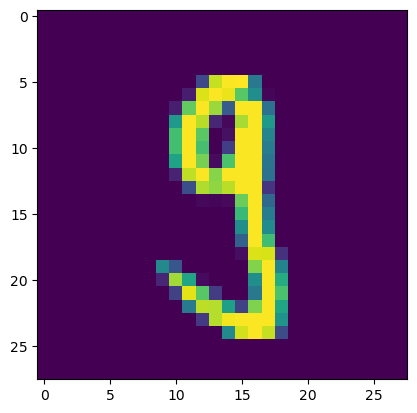

In [16]:
num = np.array(test.iloc[101,:]).reshape(28,28)
plt.imshow(num)
plt.show()

<hr>